In [ ]:
# Install necessary libraries
!pip install scikit-learn numpy-financial

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy_financial as npf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv('/content/LoanData_Bondora.csv', na_values=['n/a'])
# data = pd.read_csv('/content/LoanData_Bondora.csv')
# Define target variable for loan status
data['Status'] = data['Status'].apply(lambda x: 'Non-default' if 'Repaid' in x else 'Defaulted')

# Feature selection based on LoanData_Bondora.csv columns
# Replace with relevant features available in LoanData_Bondora.csv
features = [
    'Amount', 'Interest', 'PrincipalPaymentsMade', 'InterestAndPenaltyDebtServicingCost',
    'PrincipalDebtServicingCost', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
    'IncomeTotal', 'LiabilitiesTotal'
]
X = data[features]
y = data['Status'].apply(lambda x: 0 if x == 'Non-default' else 1)




<ipython-input-3-d767ef29b05b>:1: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/LoanData_Bondora.csv', na_values=['n/a'])


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Encode categorical variables if any additional categorical features are added
# If home_ownership, purpose, or other similar features are present, apply encoding

# Undersample the majority class (optional based on dataset balance)
default_loans = data[data['Status'] == 'Defaulted']
non_default_loans = data[data['Status'] == 'Non-default']
default_sample = default_loans.sample(len(non_default_loans), random_state=42)
undersampled_data = pd.concat([default_sample, non_default_loans])

# Redefine features and target with undersampled data
X = undersampled_data[features]
y = undersampled_data['Status'].apply(lambda x: 0 if x == 'Non-default' else 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
# Make predictions and calculate accuracy
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-default', 'Defaulted']))




Model Accuracy: 98.44%
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

 Non-default       0.98      0.99      0.98     10494
   Defaulted       0.99      0.98      0.98     10661

    accuracy                           0.98     21155
   macro avg       0.98      0.98      0.98     21155
weighted avg       0.98      0.98      0.98     21155



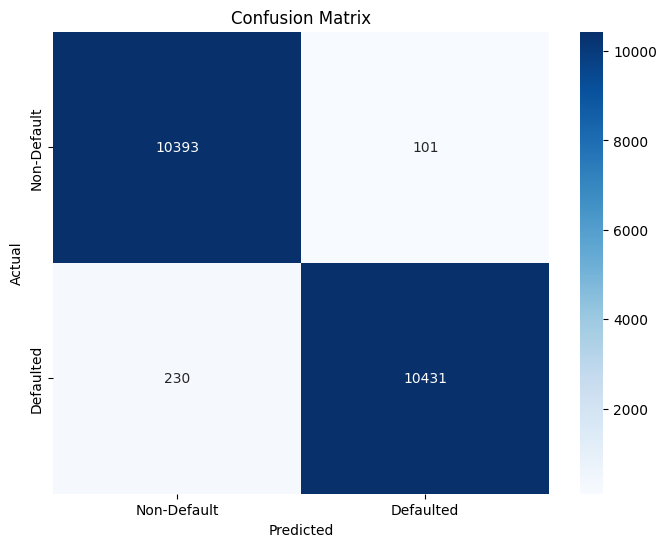

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Defaulted'], yticklabels=['Non-Default', 'Defaulted'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Accuracy vs. Number of Estimators
estimators_range = [50, 100, 150, 200, 250, 300]
accuracy_scores = []
for n in estimators_range:
    xgb_model = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))



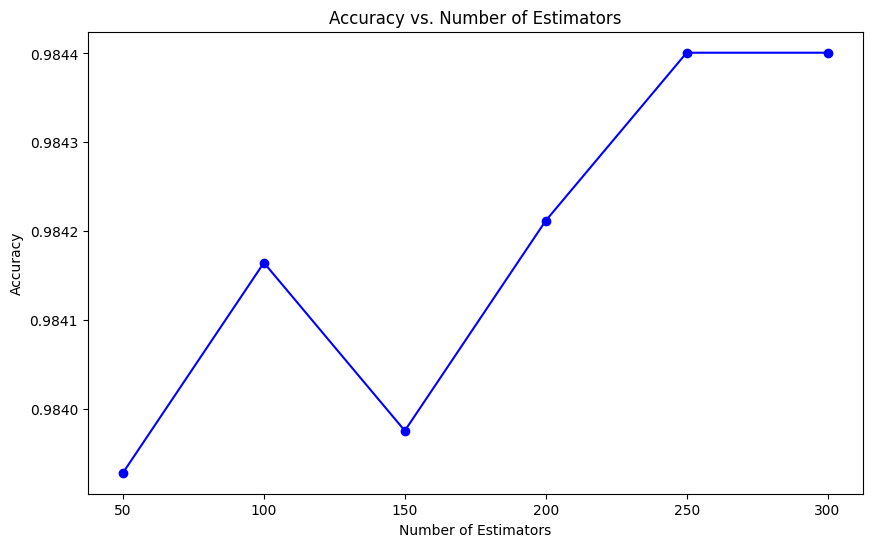

In [ ]:
# Plot accuracy over different n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()


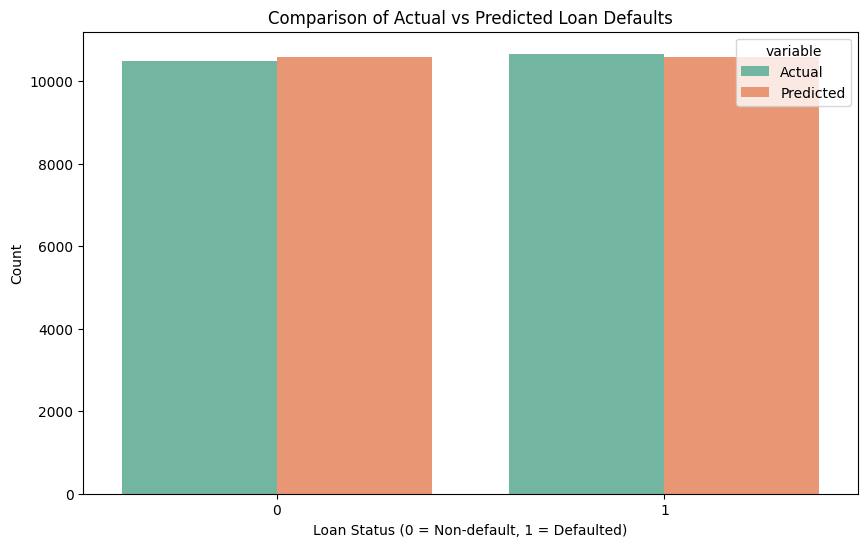

In [ ]:
# Comparison of Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df.melt(), x='value', hue='variable', palette='Set2')
plt.title('Comparison of Actual vs Predicted Loan Defaults')
plt.ylabel('Count')
plt.xlabel('Loan Status (0 = Non-default, 1 = Defaulted)')
plt.show()


In [ ]:
# Cross-validation for final model
final_xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    scale_pos_weight=1.5,
    use_label_encoder=False,
    eval_metric='logloss'
)

cv_scores = cross_val_score(final_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Fit and predict on test set
final_xgb_model.fit(X_train, y_train)
y_pred = final_xgb_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.9812692  0.97979201 0.98115103 0.98286457 0.980559  ]
Average CV Accuracy: 0.981127163306577


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Accuracy: 0.983171826991255


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:10:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


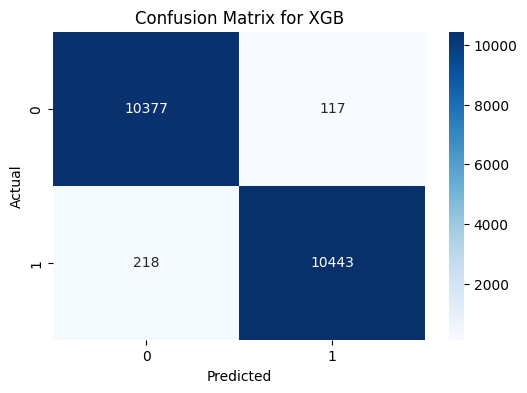

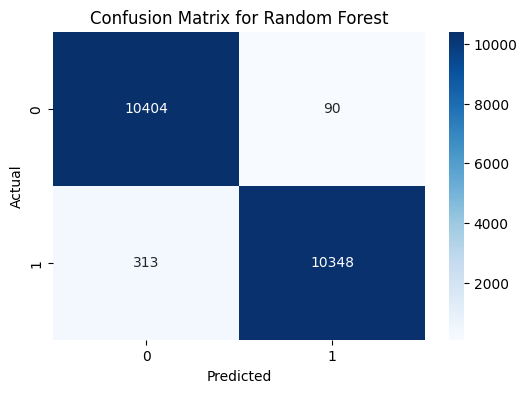

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and plot confusion matrices
models = {
    "XGB": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "ANN": MLPClassifier(random_state=42)
}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict and calculate confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
